In [1]:
# flake8: noqa: F401
%load_ext autoreload
%autoreload 2

In [2]:
import gymnasium as gym
import numpy as np
import torch
from libs.my_SAC import ac
from mujoco import viewer


c:\Users\COCUTERSASHA\.micromamba\envs\ml311\Lib\site-packages\h5py\__init__.py:36: UserWarning: h5py is running against HDF5 1.14.3 when it was built against 1.14.2, this may cause problems
  _warn(("h5py is running against HDF5 {0} when it was built against {1}, "


In [3]:
env = gym.make(
    "Ant-v4", ctrl_cost_weight=0.1, use_contact_forces=True, render_mode="human"
)

## Start

In [4]:
test = ac.ActorCritic(env)

In [5]:
test.train(300)

In [6]:
test.reward

[1003.0202442522317,
 972.611508627866,
 1083.933637418058,
 1018.5391677414619,
 967.3282716036686,
 994.9886310152016,
 959.5929607096222,
 921.2055719446436,
 899.3496979783647,
 752.3602531024239,
 118.97989433932082,
 49.84224749323534,
 810.9035444128378,
 93.52587540895277,
 302.02096602729887,
 417.0404292505537,
 55.70133799089702,
 115.67238534142535,
 607.0956353501812,
 77.49935150947783,
 287.11018692429764,
 58.404300148025946,
 26.67372189233348,
 28.452928013818127,
 22.206799927279196,
 9.800000156758388,
 28.696609778734,
 591.3647605450184,
 50.265235993986764,
 51.60639209533805,
 42.239003572928056,
 126.33575340176353,
 389.7610078945695,
 19.313984470147435,
 0.978679548851429,
 175.21879140237053,
 488.1202080780917,
 219.8854456995076,
 92.77964994891343,
 7.624403164210752,
 579.3733922408564,
 507.6441455913753,
 137.43767272568482,
 483.48718470185895,
 154.56711063274483,
 324.8256715186587,
 119.29518232743442,
 24.38334325414444,
 8.508863811670302,
 -4.0

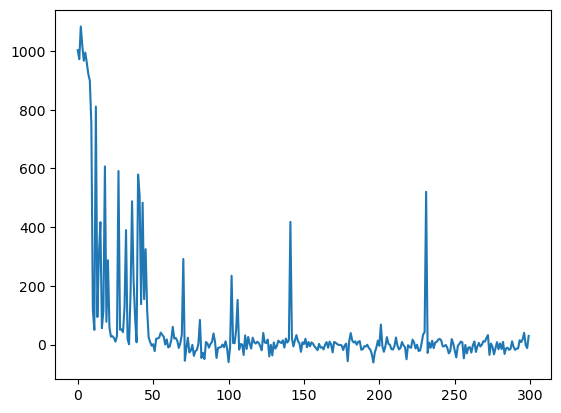

In [7]:
import matplotlib.pyplot as plt
plt.plot(test.reward)
plt.show()

In [8]:
test.demonstrate(10)

tensor([[69.8241, 64.3988, -0.7134, -0.9684, -0.1521, -1.2509, -0.3633, -0.3562]])
tensor([[ 1.3280e+02,  1.2208e+02, -1.4507e+00, -1.8324e+00, -5.4327e-02,
         -2.4140e+00, -6.4663e-01,  1.1358e+00]])
tensor([[26.3990, 23.4343, -0.2717, -0.3576,  0.5001, -0.4697, -0.1331,  1.9384]])
tensor([[-2.8156e-02, -6.9053e-01,  2.0264e+02,  8.4230e+01,  1.2067e+02,
          1.7636e+02, -2.3969e-01,  1.1241e+01]])
tensor([[ -0.8217,  -0.3987, 119.8121,  48.5505,  69.8130,  99.0942,  -0.1453,
           3.5328]])
tensor([[  1.8321,  -0.4126, 127.6397,  50.7094,  74.4723, 109.1556,  -0.1616,
           3.7723]])
tensor([[ 1.1549e-01, -5.9471e-01,  1.7461e+02,  7.2582e+01,  1.0387e+02,
          1.5387e+02, -2.0832e-01,  9.8038e+00]])
tensor([[ -0.3067,  -0.5860, 172.6828,  71.5587, 102.7327, 150.1052,  -0.2078,
          10.1789]])
tensor([[ -2.5639,  -0.5682, 169.5091,  69.4061,  99.8018, 144.8308,  -0.2024,
           9.6827]])
tensor([[ -1.7029,  -0.5748, 169.5104,  70.2144, 100.9627, 148

## Expers

In [9]:
x = np.random.rand(1, 8)
y = np.random.rand(1, 8)
mask = np.greater(x, y)
mask

array([[False,  True,  True, False, False,  True,  True, False]])

In [10]:
x, y

(array([[0.06833962, 0.40086876, 0.93428733, 0.62926487, 0.0893902 ,
         0.74485591, 0.70756213, 0.51154904]]),
 array([[0.58904699, 0.36999058, 0.46326063, 0.84743813, 0.17532775,
         0.39847151, 0.69510856, 0.65887753]]))

In [11]:
x[mask] = y[mask]

In [12]:
x

array([[0.06833962, 0.36999058, 0.46326063, 0.62926487, 0.0893902 ,
        0.39847151, 0.69510856, 0.51154904]])

In [13]:
env.action_space

Box(-1.0, 1.0, (8,), float32)

In [14]:
b = env.observation_space
b

Box(-inf, inf, (111,), float64)

In [15]:
a = env.action_space

In [16]:
a

Box(-1.0, 1.0, (8,), float32)

In [17]:
from functools import reduce
reduce(lambda x, y: x*y, a.shape)

8

In [18]:
a.low

array([-1., -1., -1., -1., -1., -1., -1., -1.], dtype=float32)

In [19]:
a.high

array([1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32)

In [20]:
obs, info = env.reset()

In [21]:
obs

array([ 8.33081185e-01,  9.94435473e-01, -6.63959610e-02,  1.54532967e-02,
        8.03172620e-02,  8.16415513e-02, -7.40298635e-03,  2.56341128e-02,
        9.26326984e-03, -2.52784503e-02,  5.39907259e-02,  3.35906682e-02,
       -3.12828620e-02,  9.26639066e-02,  2.70601635e-02,  1.64590104e-01,
        1.58483879e-01,  1.53894104e-01, -1.92841013e-01, -1.03548042e-01,
       -2.39050295e-01, -2.07636413e-04,  3.55545159e-03, -7.39625395e-02,
        3.19593348e-03, -5.03429923e-02,  4.07590449e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  

In [22]:
info

{}

In [23]:
-inf < 0

NameError: name 'inf' is not defined

In [ ]:
b.low

array([-inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf, -inf,
       -inf])

In [ ]:
b.low[0] < 0

True

In [ ]:
env.action_space.sample()

array([-0.79287153, -0.5377006 , -0.11047326,  0.68640614, -0.9583106 ,
        0.23432463, -0.1227399 , -0.38483605], dtype=float32)

In [ ]:
env.step(env.action_space.sample())

(array([  0.80215725,   0.99282433,   0.07986159,   0.07899731,
         -0.04100492,   0.03530946,   0.41730903,   0.17995299,
         -0.44672993,   0.05763122,  -0.47662351,   0.09798006,
          0.3619918 ,   0.29851821,  -0.32462134,   0.37449529,
         -0.22176439,   0.81516648,  -1.65136014,   4.87534154,
          9.57009385,   4.04430968, -13.36952955,  -0.72836031,
        -14.05348782,   4.34665891,   7.88941027,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.

In [ ]:
s1, r, _, _, _ = env.step(env.action_space.sample())

In [28]:
a = torch.rand(3, requires_grad=True)
a

tensor([0.8427, 0.8774, 0.9674], requires_grad=True)

In [29]:
b = a**3 * 3

In [30]:
b

tensor([1.7953, 2.0264, 2.7161], grad_fn=<MulBackward0>)

In [31]:
c = b.detach()
c

tensor([1.7953, 2.0264, 2.7161])

In [1]:
import torch
from transformers import AutoTokenizer, BertModel

tokenizer = AutoTokenizer.from_pretrained("google-bert/bert-base-uncased")
model = BertModel.from_pretrained("google-bert/bert-base-uncased")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
# outputs = model(**inputs)

# last_hidden_states = outputs.last_hidden_state

c:\Users\COCUTERSASHA\.micromamba\envs\ml311\Lib\site-packages\huggingface_hub\utils\_runtime.py:185: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(


In [2]:
inputs

{'input_ids': tensor([[  101,  7592,  1010,  2026,  3899,  2003, 10140,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1]])}

In [3]:
torch.tensor([[1, 1, 1, 0, 0, 1, 1, 1] * 64]).shape

torch.Size([1, 512])

In [4]:
out = model(
    input_ids=torch.tensor([[1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]),
    attention_mask=torch.tensor([[1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]),
    output_attentions=True,
    # **inputs,
)  # type: ignore


In [5]:
out.keys()

odict_keys(['last_hidden_state', 'pooler_output', 'attentions'])

In [6]:
out['last_hidden_state'].size()

torch.Size([2, 5, 768])

In [9]:
out['last_hidden_state'][0][0]

tensor([-3.1107e-01, -1.9142e-01, -2.0411e-01, -2.2312e-01, -3.2605e-01,
        -2.8806e-01,  6.2522e-01,  3.1729e-01,  3.2799e-01, -6.5711e-01,
        -7.0238e-01, -6.2993e-01, -5.0763e-01,  6.5335e-01,  2.8131e-01,
         9.7955e-01,  5.9095e-01,  9.0429e-01, -5.0130e-01,  1.5877e-01,
         9.8655e-01,  5.1133e-01,  1.1313e-01,  1.3846e+00,  3.6426e-02,
        -5.7764e-02,  6.9405e-01, -2.2866e-01,  6.4159e-02, -5.6453e-01,
         1.2820e-02,  4.9068e-01, -1.1890e-01,  1.6164e-01,  1.3990e-02,
        -9.3309e-01,  6.0538e-02, -1.3586e-01, -1.2612e-01,  4.5121e-01,
        -9.7270e-01, -9.7908e-01,  7.4734e-01,  5.8402e-01,  1.3921e-01,
        -1.3308e+00, -7.3978e-01,  2.4956e-01, -1.7390e-01, -7.3726e-01,
        -6.0791e-01, -1.8477e-02,  5.7647e-01,  3.9995e-01,  1.1326e-01,
         1.2747e+00, -7.3558e-01, -6.6842e-01, -1.8683e-01, -2.6875e-01,
         1.4492e-01,  4.3477e-03, -4.2629e-01, -4.2150e-01,  6.4127e-01,
        -2.2784e-03,  4.2255e-01,  2.0625e-01, -5.2

In [8]:
out['attentions'][0].size()

torch.Size([2, 12, 5, 5])

In [83]:
[att.shape for att in out["attentions"]]

[torch.Size([2, 12, 5, 5]),
 torch.Size([2, 12, 5, 5]),
 torch.Size([2, 12, 5, 5]),
 torch.Size([2, 12, 5, 5]),
 torch.Size([2, 12, 5, 5]),
 torch.Size([2, 12, 5, 5]),
 torch.Size([2, 12, 5, 5]),
 torch.Size([2, 12, 5, 5]),
 torch.Size([2, 12, 5, 5]),
 torch.Size([2, 12, 5, 5]),
 torch.Size([2, 12, 5, 5]),
 torch.Size([2, 12, 5, 5])]

In [1]:
from transformers import AutoTokenizer, DistilBertModel, DistilBertConfig
import torch

c:\Users\COCUTERSASHA\.micromamba\envs\ml311\Lib\site-packages\huggingface_hub\utils\_runtime.py:185: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(


In [ ]:
bert_config = DistilBertConfig(
    n_layers=6,
)

In [2]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")

inputs = tokenizer("Hello, my dog is cute", return_tensors="pt")
outputs = model(**inputs)

last_hidden_states = outputs.last_hidden_state

In [3]:
last_hidden_states

tensor([[[-1.8296e-01, -7.4054e-02,  5.0268e-02,  ..., -1.1261e-01,
           4.4493e-01,  4.0941e-01],
         [ 7.0637e-04,  1.4825e-01,  3.4328e-01,  ..., -8.6040e-02,
           6.9475e-01,  4.3353e-02],
         [-5.0721e-01,  5.3086e-01,  3.7163e-01,  ..., -5.6287e-01,
           1.3756e-01,  2.8475e-01],
         ...,
         [-4.2251e-01,  5.7315e-02,  2.4338e-01,  ..., -1.5223e-01,
           2.4462e-01,  6.4155e-01],
         [-4.9385e-01, -1.8895e-01,  1.2641e-01,  ...,  6.3240e-02,
           3.6913e-01, -5.8252e-02],
         [ 8.3269e-01,  2.4948e-01, -4.5440e-01,  ...,  1.1998e-01,
          -3.9257e-01, -2.7785e-01]]], grad_fn=<NativeLayerNormBackward0>)

In [4]:
last_hidden_states.size()

torch.Size([1, 8, 768])

In [18]:
import torchinfo

In [10]:
out = model(
    input_ids=torch.tensor([[1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]),
    attention_mask=torch.tensor([[1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]),
    output_attentions=True,
    n_layers=2,
    n_heads=,
    # **inputs,
)  # type: ignore


In [20]:
torchinfo.summary(
    model,
    input_data=torch.tensor([[1, 1, 1, 1, 1], [1, 1, 1, 1, 1]]),
)

Layer (type:depth-idx)                             Output Shape              Param #
DistilBertModel                                    [2, 5, 768]               --
├─Embeddings: 1-1                                  [2, 5, 768]               --
│    └─Embedding: 2-1                              [2, 5, 768]               23,440,896
│    └─Embedding: 2-2                              [1, 5, 768]               393,216
│    └─LayerNorm: 2-3                              [2, 5, 768]               1,536
│    └─Dropout: 2-4                                [2, 5, 768]               --
├─Transformer: 1-2                                 [2, 5, 768]               --
│    └─ModuleList: 2-5                             --                        --
│    │    └─TransformerBlock: 3-1                  [2, 5, 768]               7,087,872
│    │    └─TransformerBlock: 3-2                  [2, 5, 768]               7,087,872
│    │    └─TransformerBlock: 3-3                  [2, 5, 768]               7,087,87

In [11]:
out

BaseModelOutput(last_hidden_state=tensor([[[ 0.2091, -0.1150,  0.4053,  ..., -0.1064,  0.3978, -0.1910],
         [ 0.2581, -0.0427,  0.3830,  ..., -0.0798,  0.3875, -0.2705],
         [ 0.2772, -0.0596,  0.3658,  ..., -0.0934,  0.3744, -0.2529],
         [ 0.2864, -0.0826,  0.3737,  ..., -0.1023,  0.3839, -0.2486],
         [ 0.2888, -0.0956,  0.3856,  ..., -0.1115,  0.3933, -0.2487]],

        [[ 0.2091, -0.1150,  0.4053,  ..., -0.1064,  0.3978, -0.1910],
         [ 0.2581, -0.0427,  0.3830,  ..., -0.0798,  0.3875, -0.2705],
         [ 0.2772, -0.0596,  0.3658,  ..., -0.0934,  0.3744, -0.2529],
         [ 0.2864, -0.0826,  0.3737,  ..., -0.1023,  0.3839, -0.2486],
         [ 0.2888, -0.0956,  0.3856,  ..., -0.1115,  0.3933, -0.2487]]],
       grad_fn=<NativeLayerNormBackward0>), hidden_states=None, attentions=(tensor([[[[0.1015, 0.2115, 0.2329, 0.2243, 0.2298],
          [0.1966, 0.1965, 0.2003, 0.1991, 0.2075],
          [0.2200, 0.1941, 0.1944, 0.1921, 0.1994],
          [0.2228, 0

In [12]:
out.keys()

odict_keys(['last_hidden_state', 'attentions'])

In [13]:
out['last_hidden_state'].size()

torch.Size([2, 5, 768])

In [16]:
len(out['attentions'])

6

In [17]:
out['attentions'][0].size()

torch.Size([2, 12, 5, 5])

In [31]:
out['attentions']

(tensor([[[[0.1015, 0.2115, 0.2329, 0.2243, 0.2298],
           [0.1966, 0.1965, 0.2003, 0.1991, 0.2075],
           [0.2200, 0.1941, 0.1944, 0.1921, 0.1994],
           [0.2228, 0.1967, 0.1947, 0.1889, 0.1969],
           [0.2205, 0.1977, 0.1968, 0.1903, 0.1948]],
 
          [[0.8230, 0.0473, 0.0435, 0.0451, 0.0411],
           [0.6195, 0.0964, 0.0951, 0.0981, 0.0910],
           [0.6302, 0.0945, 0.0909, 0.0959, 0.0885],
           [0.6221, 0.0970, 0.0933, 0.0972, 0.0904],
           [0.6133, 0.0988, 0.0954, 0.1002, 0.0924]],
 
          [[0.8655, 0.0559, 0.0299, 0.0237, 0.0249],
           [0.4005, 0.4421, 0.0506, 0.0734, 0.0334],
           [0.0177, 0.9492, 0.0202, 0.0027, 0.0101],
           [0.0173, 0.0323, 0.9148, 0.0294, 0.0062],
           [0.0276, 0.0084, 0.0121, 0.9141, 0.0378]],
 
          [[0.5396, 0.1244, 0.1163, 0.1163, 0.1034],
           [0.4112, 0.3344, 0.1011, 0.0942, 0.0591],
           [0.0808, 0.6957, 0.1276, 0.0514, 0.0444],
           [0.0297, 0.3230, 0.5052, 0

In [30]:
out['attentions'][0].size()

torch.Size([2, 12, 5, 5])